<a href="https://colab.research.google.com/github/Swayamprakashpatel/IR_Tablet/blob/main/IR_Tablet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)


In [ ]:


# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]
X2 = X.iloc[:, 2:8].apply(pd.to_numeric, errors='coerce') / 100
X3 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000

y1 = df.iloc[:, -3].apply(pd.to_numeric, errors='coerce') / 100  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, -2].apply(pd.to_numeric, errors='coerce') / 100  # Output column 2 = % Friability
y3 = df.iloc[:, -1].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_train, y1_train)
y1_pred_linear = linear_reg_y1.predict(X_test)
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_train, y2_train)
y2_pred_linear = linear_reg_y2.predict(X_test)
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_train, y3_train)
y3_pred_linear = linear_reg_y3.predict(X_test)
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR()
svm_y1.fit(X_train, y1_train)
y1_pred_svm = svm_y1.predict(X_test)
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_train, y2_train)
y2_pred_svm = svm_y2.predict(X_test)
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_train, y3_train)
y3_pred_svm = svm_y3.predict(X_test)
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_train, y1_train)
y1_pred_knn = knn_y1.predict(X_test)
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_train, y2_train)
y2_pred_knn = knn_y2.predict(X_test)
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_train, y3_train)
y3_pred_knn = knn_y3.predict(X_test)
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)

# Artificial Neural Network (ANN) for y1
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath_y1, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=2, verbose =1)]

ann_y1 = tf.keras.Sequential([
                             tf.keras.layers.Dense(75, activation='relu', input_shape=(13,)),
                             #tf.keras.layers.Dense(111, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='relu')])

ann_y1.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = ann_y1.fit(X_train, y1_train, epochs= 10, callbacks=[checkpoint],validation_data=(X_test, y1_test), batch_size= None)
y1_pred_ann = ann_y1.predict(X_test)

# Artificial Neural Network (ANN) for y2
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath_y2, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=2, verbose =1)]

ann_y2 = tf.keras.Sequential([
                             tf.keras.layers.Dense(5, activation='relu', input_shape=(13,)),
                             #tf.keras.layers.Dense(515, activation='relu'),
                             #tf.keras.layers.Dense(1762, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='relu')])

ann_y2.compile(optimizer=tf.keras.optimizers.SGD(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = ann_y2.fit(X_train, y2_train, epochs= 10, callbacks=[checkpoint],validation_data=(X_test, y2_test), batch_size= None)
y2_pred_ann = ann_y2.predict(X_test)

# Artificial Neural Network (ANN) for y3
filepath_y3 = '/content/drive/My Drive/y3.hdf5'
checkpoint = [tf.keras.callbacks.ModelCheckpoint(filepath_y3, monitor='val_root_mean_squared_error', mode='min', save_best_only=True, Save_weights_only = False, verbose = 1),
              tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=350, verbose =1)]

ann_y3 = tf.keras.Sequential([
                             tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
                             tf.keras.layers.Dense(369, activation='relu'),
                             tf.keras.layers.Dense(369, activation='relu'),
                            # tf.keras.layers.Dense(65, activation='relu'),
                             tf.keras.layers.Dense(1, activation ='tanh')])

ann_y3.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.1), loss=tf.keras.losses.MeanSquaredError(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
hist = ann_y3.fit(X_train, y3_train, epochs= 10000, callbacks=[checkpoint],validation_data=(X_test, y3_test), batch_size= None)
y3_pred_ann = ann_y3.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 1/10
 1/17 [>.............................] - ETA: 11s - loss: 0.0078 - root_mean_squared_error: 0.0883
Epoch 1: val_root_mean_squared_error improved from inf to 0.05435, saving model to /content/drive/My Drive/y1.hdf5
17/17 [==============================] - 1s 15ms/step - loss: 0.0038 - root_mean_squared_error: 0.0616 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0544
Epoch 2/10
 1/17 [>.............................] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0535
Epoch 2: val_root_mean_squared_error improved from 0.05435 to 0.05256, saving model to /content/drive/My Drive/y1.hdf5
17/17 [==============================] - 0s 7ms/step - loss: 0.0029 - root_mean_squared_error: 0.0539 - val_loss: 0.0028 - val_root_mean_squared_error: 0.0526
Epoch 3/10
 1/17 [>.............................] - ETA: 0s - loss: 0.0029 - root_mean_squared_error: 0.0542
Epoch 3: val_root_mean_squared_error improved from 0.05256 to 0.04909, saving model to /content/drive/My Drive/y1.hdf5


In [ ]:
print(X_encoded)
print(y3)

     Binder Type_PS630  Binder Type_PVP  Binder Type_SDL  \
0                  0.0              1.0              0.0   
1                  0.0              1.0              0.0   
2                  0.0              1.0              0.0   
3                  0.0              1.0              0.0   
4                  0.0              1.0              0.0   
..                 ...              ...              ...   
859                0.0              0.0              0.0   
860                0.0              0.0              0.0   
861                0.0              0.0              0.0   
862                0.0              0.0              0.0   
863                0.0              0.0              0.0   

     Disintegration Type_CP  Disintegration Type_S1500  \
0                       0.0                        0.0   
1                       0.0                        0.0   
2                       0.0                        0.0   
3                       0.0                    

Linear Regression MSE for y1: 0.00039741541067427787
Linear Regression MSE for y2: 6.672579279359607e-05
Linear Regression MSE for y3: 0.0019562261842522638
SVM MSE for y1: 0.0012757225433526016
SVM MSE for y2: 0.0006555003034682083
SVM MSE for y3: 0.0038759416942022195
k-NN MSE for y1: 0.0010604236300578035
k-NN MSE for y2: 0.00010147512485549133
k-NN MSE for y3: 0.003163782543352601
ANN MSE for y1: 0.0014228852535370844
ANN MSE for y2: 0.00025218333961653385
ANN MSE for y3: 0.001280755664758612


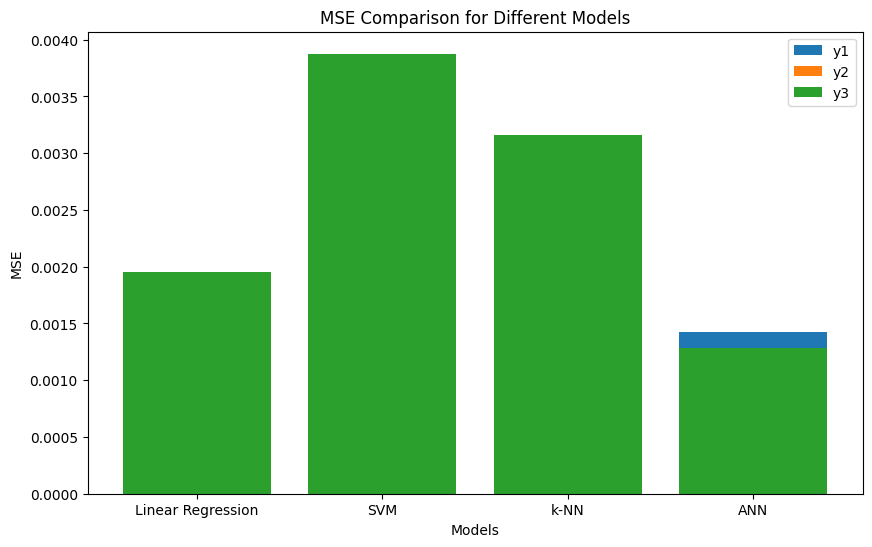

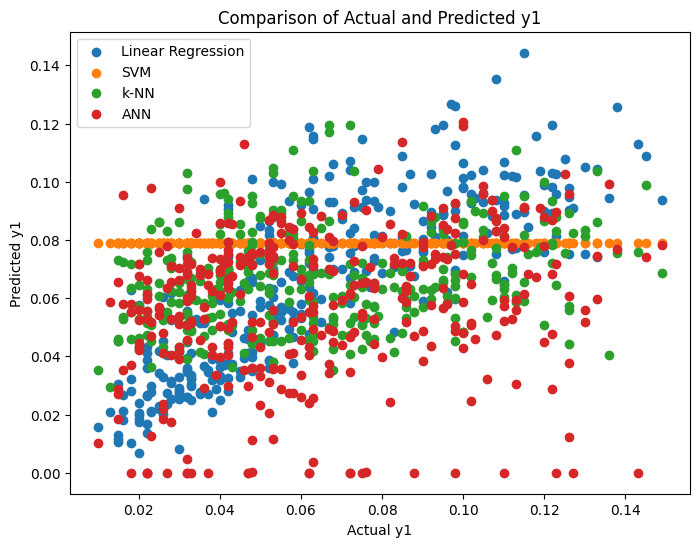

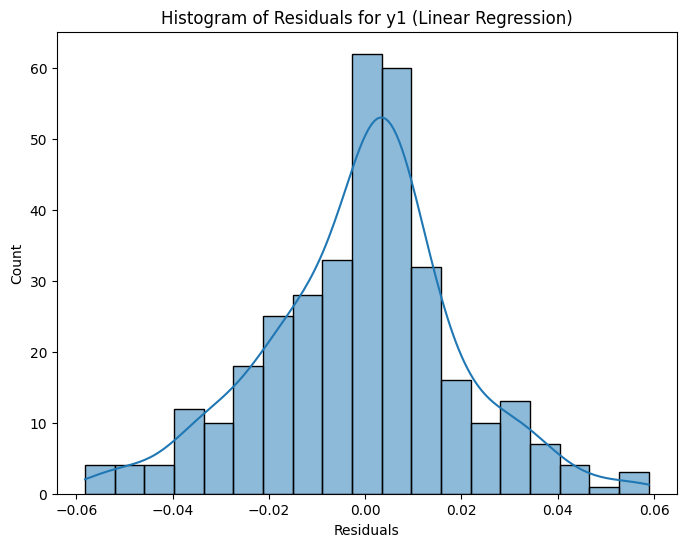

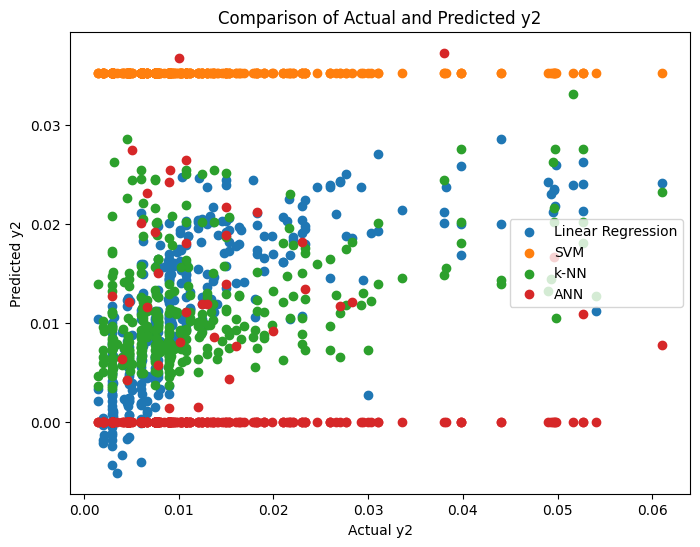

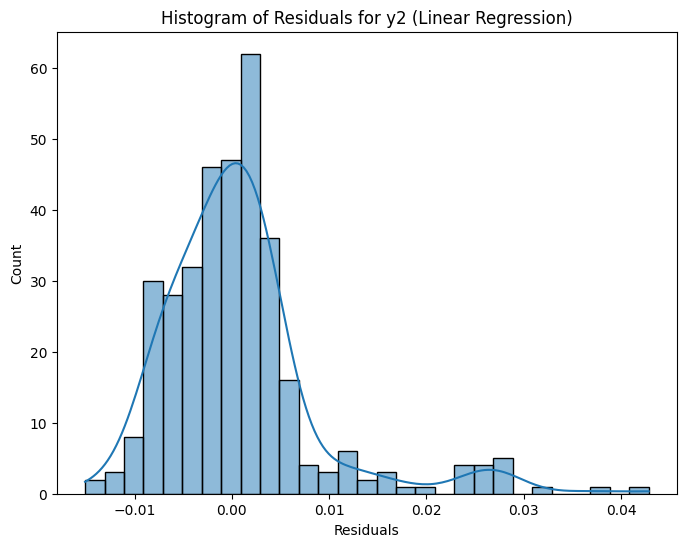

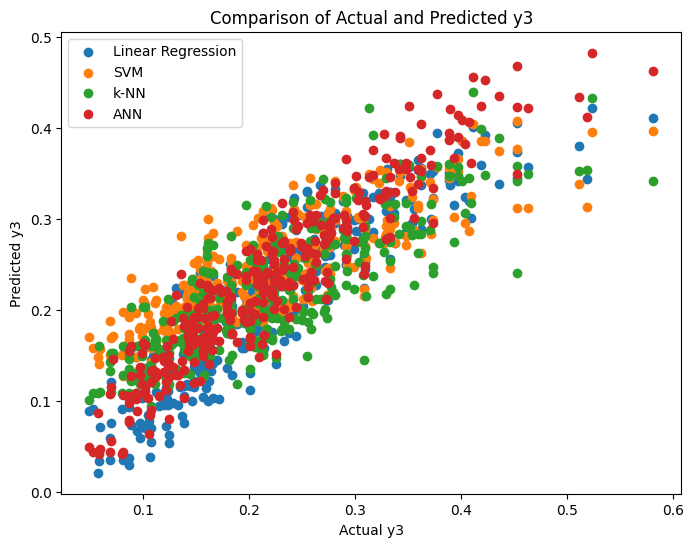

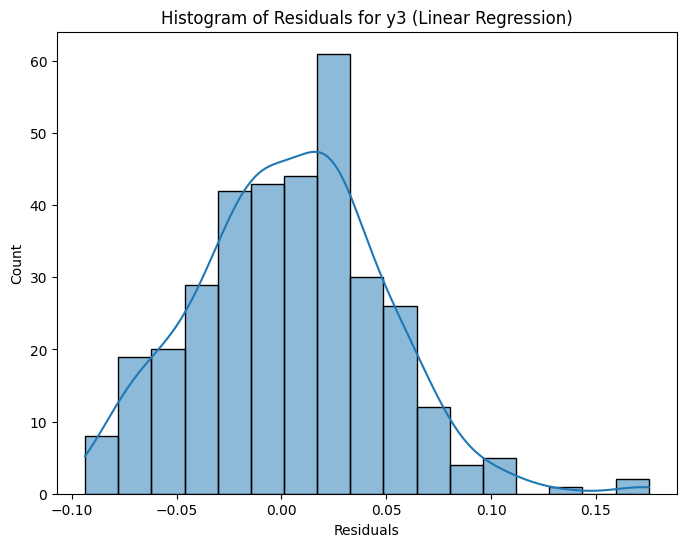

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Create a bar plot of MSE values for each model
models = ['Linear Regression', 'SVM', 'k-NN', 'ANN']
mse_values_y1 = [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1]
mse_values_y2 = [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2]
mse_values_y3 = [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values_y1, label='y1')
plt.bar(models, mse_values_y2, label='y2')
plt.bar(models, mse_values_y3, label='y3')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('MSE Comparison for Different Models')
plt.legend()
plt.show()

# Create a scatter plot to compare predicted and actual values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_linear, label='Linear Regression')
plt.scatter(y1_test, y1_pred_svm, label='SVM')
plt.scatter(y1_test, y1_pred_knn, label='k-NN')
plt.scatter(y1_test, y1_pred_ann, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.show()

# Create a histogram of residuals for y1
residuals_y1 = y1_test - y1_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y1, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y1 (Linear Regression)')
plt.show()

# Create a scatter plot to compare predicted and actual values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_linear, label='Linear Regression')
plt.scatter(y2_test, y2_pred_svm, label='SVM')
plt.scatter(y2_test, y2_pred_knn, label='k-NN')
plt.scatter(y2_test, y2_pred_ann, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.show()

# Create a histogram of residuals for y2
residuals_y2 = y2_test - y2_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y2 (Linear Regression)')
plt.show()

# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, y3_pred_linear, label='Linear Regression')
plt.scatter(y3_test, y3_pred_svm, label='SVM')
plt.scatter(y3_test, y3_pred_knn, label='k-NN')
plt.scatter(y3_test, y3_pred_ann, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.show()

# Create a histogram of residuals for y3
residuals_y3 = y3_test - y3_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y3, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y3 (Linear Regression)')
plt.show()



27/27 [==============================] - 0s 2ms/step


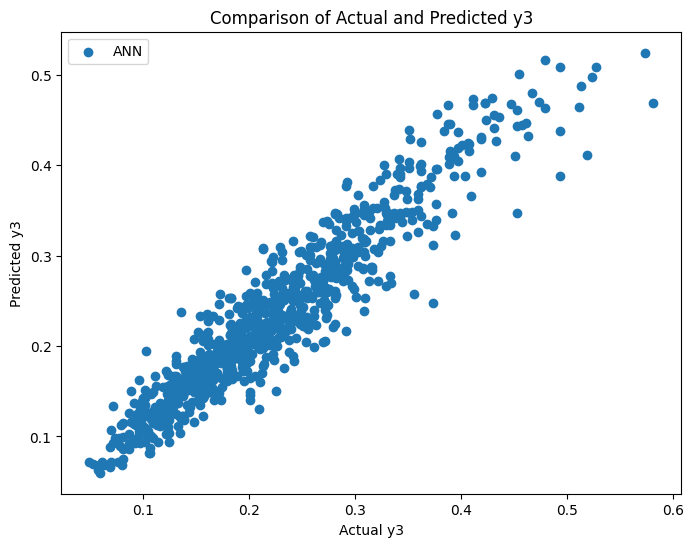

In [ ]:
y3_pred_ann_all = ann_y3.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3, y3_pred, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.show()

In [ ]:
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)

print(r2_y3_ann_all)

0.8421136378261509


In [ ]:
# Calculate R-squared value for each model and output variable
r2_y1_linear = linear_reg_y1.score(X_test, y1_test)
r2_y2_linear = linear_reg_y2.score(X_test, y2_test)
r2_y3_linear = linear_reg_y3.score(X_test, y3_test)

r2_y1_svm = svm_y1.score(X_test, y1_test)
r2_y2_svm = svm_y2.score(X_test, y2_test)
r2_y3_svm = svm_y3.score(X_test, y3_test)

r2_y1_knn = knn_y1.score(X_test, y1_test)
r2_y2_knn = knn_y2.score(X_test, y2_test)
r2_y3_knn = knn_y3.score(X_test, y3_test)

r2_y1_ann = ann_y1.evaluate(X_test, y1_test)
r2_y1_ann = ann_y2.evaluate(X_test, y2_test)
r2_y3_ann = ann_y3.evaluate(X_test, y3_test)
# Predict using the trained ANN model
y1_pred_ann = ann_y1.predict(X_test)
y2_pred_ann = ann_y2.predict(X_test)
y3_pred_ann = ann_y3.predict(X_test)

# Calculate R-squared value for y1,y2 and y3
from sklearn.metrics import r2_score
r2_y1_ann = r2_score(y1_test, y1_pred_ann)
r2_y2_ann = r2_score(y2_test, y2_pred_ann)
r2_y3_ann = r2_score(y3_test, y3_pred_ann)


# Calculate residuals for each model and output variable
residuals_y1_linear = y1_test - y1_pred_linear
residuals_y2_linear = y2_test - y2_pred_linear
residuals_y3_linear = y3_test - y3_pred_linear

residuals_y1_svm = y1_test - y1_pred_svm
residuals_y2_svm = y2_test - y2_pred_svm
residuals_y3_svm = y3_test - y3_pred_svm

residuals_y1_knn = y1_test - y1_pred_knn
residuals_y2_knn = y2_test - y2_pred_knn
residuals_y3_knn = y3_test - y3_pred_knn


y1_test_1d = y1_test.ravel()
y1_pred_ann_1d = y1_pred_ann.ravel()
residuals_y1_ann = y1_test_1d - y1_pred_ann_1d

y2_test_1d = y2_test.ravel()
y2_pred_ann_1d = y2_pred_ann.ravel()
residuals_y2_ann = y2_test_1d - y2_pred_ann_1d

y3_test_1d = y3_test.ravel()
y3_pred_ann_1d = y3_pred_ann.ravel()
residuals_y3_ann = y3_test_1d - y3_pred_ann_1d

# Print the mean of residuals for y1
mean_residuals_y1_ann = np.mean(residuals_y1_ann)



# Store the evaluation metrics in a DataFrame
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'k-NN', 'ANN'],
    'MSE y1': [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1],
    'MSE y2': [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2],
    'MSE y3': [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3],
    'R^2 y1': [r2_y1_linear, r2_y1_svm, r2_y1_knn, r2_y1_ann],
    'R^2 y2': [r2_y2_linear, r2_y2_svm, r2_y2_knn, r2_y2_ann],
    'R^2 y3': [r2_y3_linear, r2_y3_svm, r2_y3_knn, r2_y3_ann],
    'Residuals y1': [np.mean(residuals_y1_linear), np.mean(residuals_y1_svm),
                     np.mean(residuals_y1_knn), np.mean(residuals_y1_ann)],
    'Residuals y2': [np.mean(residuals_y2_linear), np.mean(residuals_y2_svm),
                     np.mean(residuals_y2_knn), np.mean(residuals_y2_ann)],
    'Residuals y3': [np.mean(residuals_y3_linear), np.mean(residuals_y3_svm),
                     np.mean(residuals_y3_knn), np.mean(residuals_y3_ann)]
})

# Print the evaluation metrics
print("Evaluation Metrics:")
print(metrics)


11/11 [==============================] - 0s 2ms/step
Evaluation Metrics:
               Model    MSE y1    MSE y2    MSE y3    R^2 y1    R^2 y2  \
0  Linear Regression  0.000397  0.000067  0.001956  0.627093  0.461243   
1                SVM  0.001276  0.000656  0.003876 -0.197048 -4.292638   
2               k-NN  0.001060  0.000101  0.003164  0.004973  0.180670   
3                ANN  0.001423  0.000252  0.001281 -0.335135 -1.036178   

     R^2 y3  Residuals y1  Residuals y2  Residuals y3  
0  0.784934     -0.000789      0.000741      0.004124  
1  0.573882     -0.014491     -0.023058     -0.025875  
2  0.652176     -0.002021      0.001005     -0.000271  
3  0.859195      0.007543      0.010553     -0.012550  


In [ ]:
# Feature importances for y1
y1_feature_importances = np.abs(linear_reg_y1.coef_)
y1_feature_names = X_encoded.columns
y1_feature_importance_df = pd.DataFrame({'Feature': y1_feature_names, 'Importance': y1_feature_importances})
y1_feature_importance_df = y1_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importances for y2
y2_feature_importances = np.abs(linear_reg_y2.coef_)
y2_feature_names = X_encoded.columns
y2_feature_importance_df = pd.DataFrame({'Feature': y2_feature_names, 'Importance': y2_feature_importances})
y2_feature_importance_df = y2_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importances for y3
y3_feature_importances = np.abs(linear_reg_y3.coef_)
y3_feature_names = X_encoded.columns
y3_feature_importance_df = pd.DataFrame({'Feature': y3_feature_names, 'Importance': y3_feature_importances})
y3_feature_importance_df = y3_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances for y1, y2, and y3
print("Feature Importances for y1:")
print(y1_feature_importance_df)
print("\nFeature Importances for y2:")
print(y2_feature_importance_df)
print("\nFeature Importances for y3:")
print(y3_feature_importance_df)


Feature Importances for y1:
                      Feature  Importance
11    Compressional Force(kN)    1.754829
10             Punch Size(mm)    1.335844
9                       A_MCC    0.355142
7            Binder Amount(%)    0.176444
12          Tablet Weight(mg)    0.081667
8                         A_M    0.044919
6      Disintegrant Amount(%)    0.018302
0           Binder Type_PS630    0.011707
5     Disintegration Type_SSG    0.010753
3      Disintegration Type_CP    0.010099
1             Binder Type_PVP    0.008576
2             Binder Type_SDL    0.001620
4   Disintegration Type_S1500    0.000345

Feature Importances for y2:
                      Feature  Importance
10             Punch Size(mm)    0.425536
11    Compressional Force(kN)    0.410421
7            Binder Amount(%)    0.340294
8                         A_M    0.267999
6      Disintegrant Amount(%)    0.251075
9                       A_MCC    0.243861
5     Disintegration Type_SSG    0.003485
3      Disintegrati

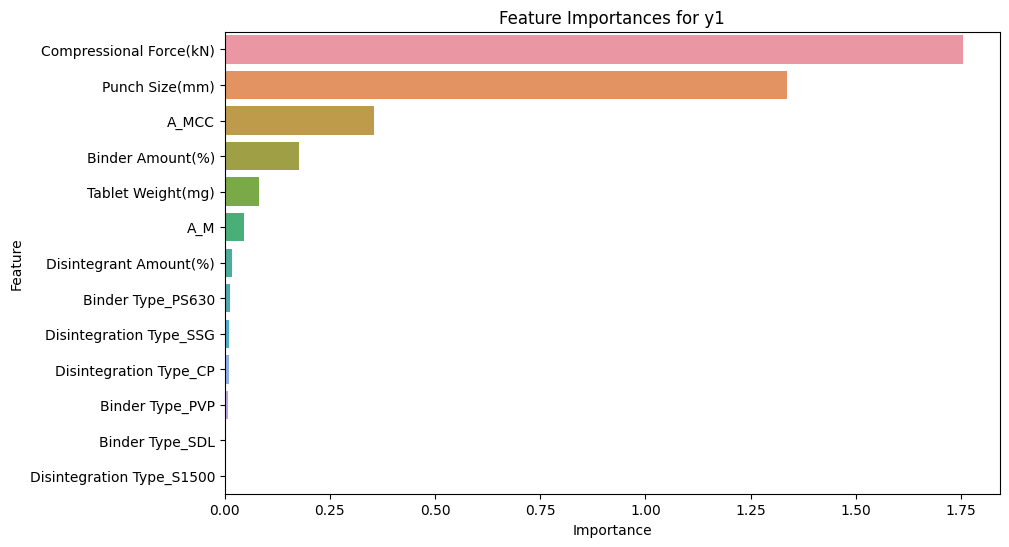

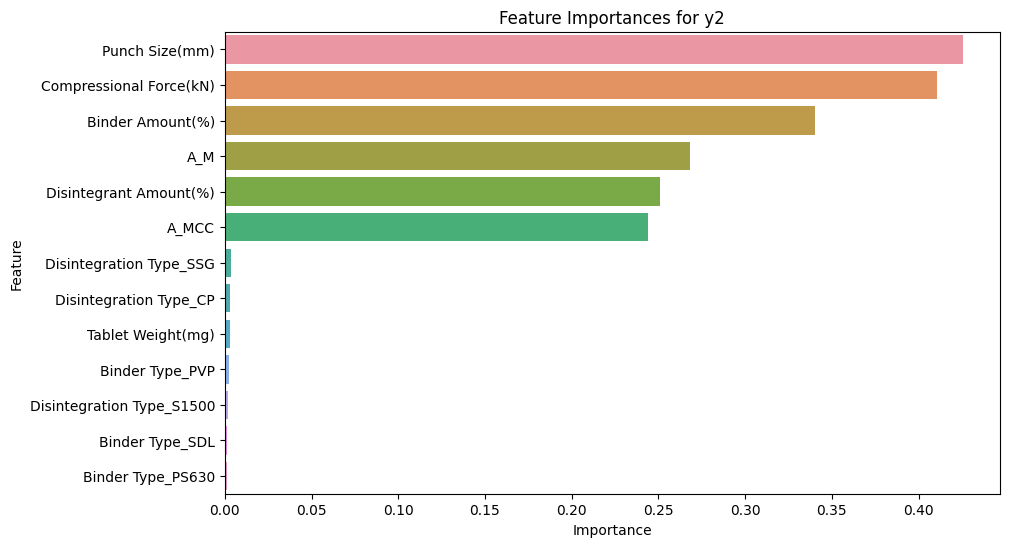

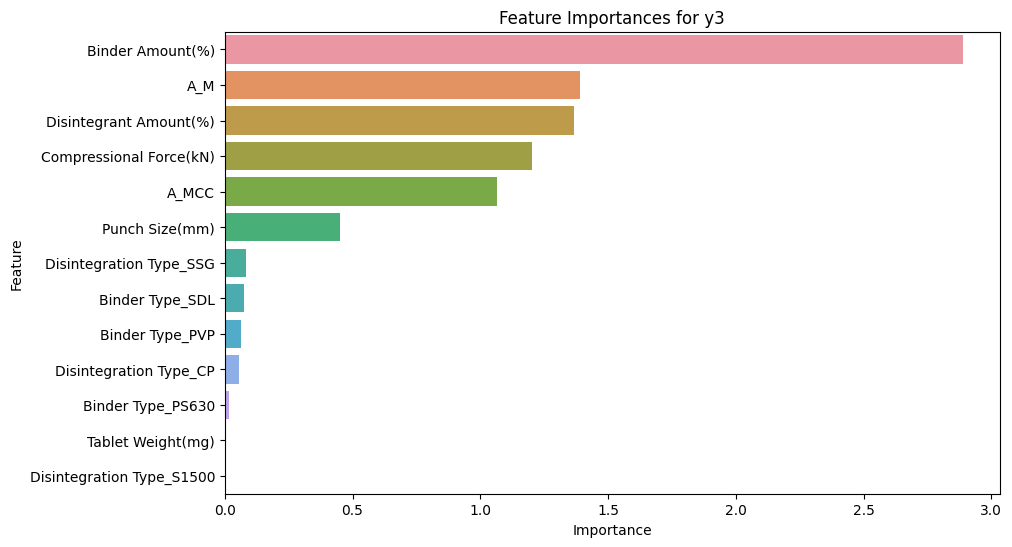

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y1
sns.barplot(x='Importance', y='Feature', data=y1_feature_importance_df)
plt.title('Feature Importances for y1')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y2
sns.barplot(x='Importance', y='Feature', data=y2_feature_importance_df)
plt.title('Feature Importances for y2')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y3
sns.barplot(x='Importance', y='Feature', data=y3_feature_importance_df)
plt.title('Feature Importances for y3')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Feature Importances for y1:


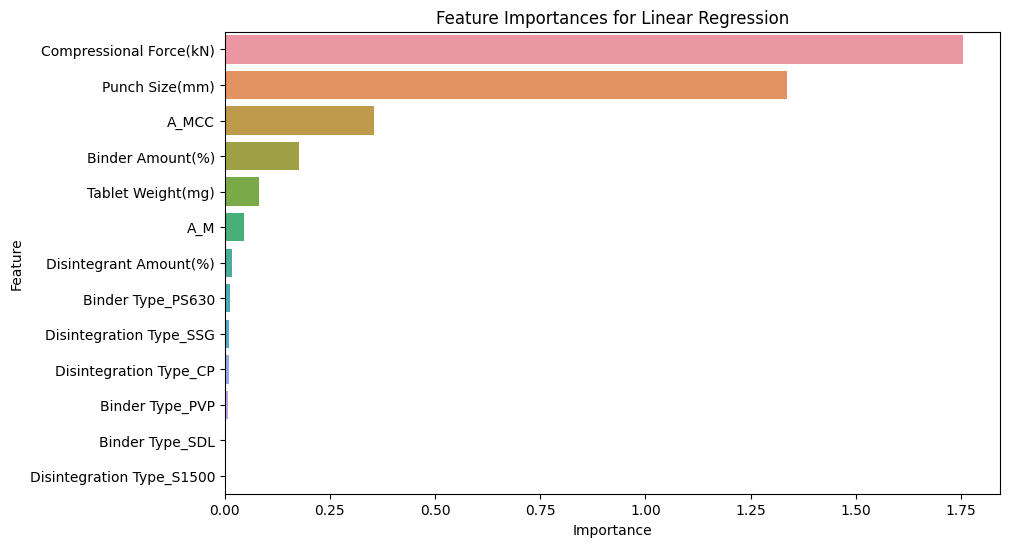

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.
Feature Importances for y2:


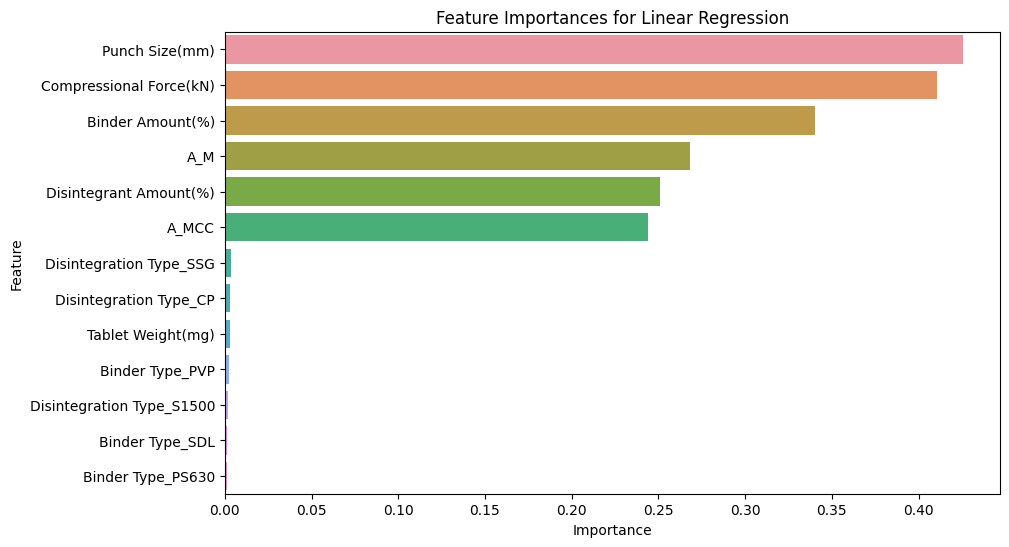

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.
Feature Importances for y3:


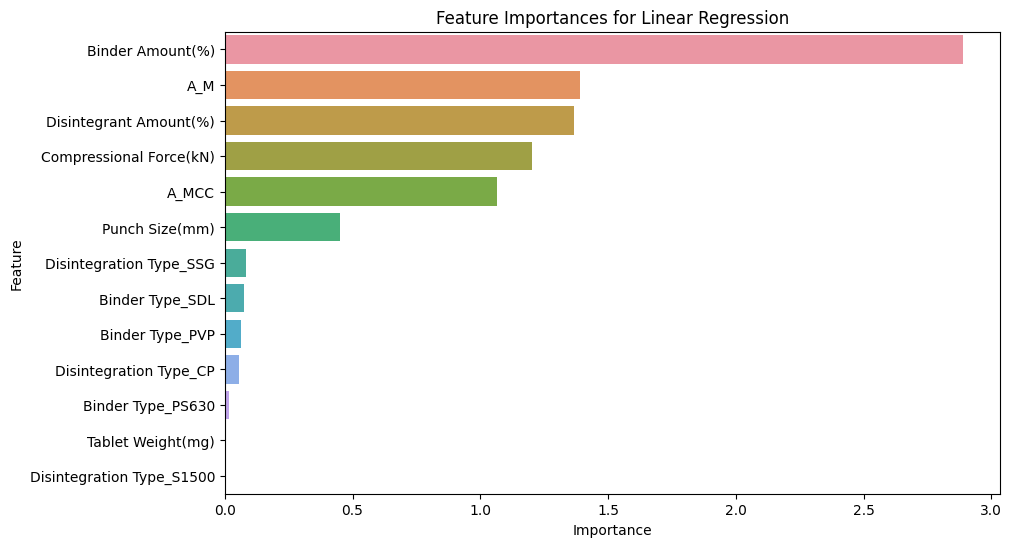

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# ... (previous code to load and preprocess the data)

# Function to calculate and visualize feature importances
def calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_)
    # Calculate feature importances for SVM, k-NN, and ANN models
    else:
        feature_importances = None

    if feature_importances is not None:
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Visualization of feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Feature Importances for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"Feature importances are not available for {model_name}.")

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances for y1
print("Feature Importances for y1:")
for model, model_name in zip(models_y1, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y1_train, y1_test)

# Loop through all models and visualize feature importances for y2
print("Feature Importances for y2:")
for model, model_name in zip(models_y2, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y2_train, y2_test)

# Loop through all models and visualize feature importances for y3
print("Feature Importances for y3:")
for model, model_name in zip(models_y3, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y3_train, y3_test)


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import shap

# ... (previous code to load and preprocess the data)

# Function to calculate and visualize feature importances
def calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_)
        feature_names = X_train.columns
    # Calculate feature importances for SVM and k-NN using permutation feature importance
    elif isinstance(model, (SVR, KNeighborsRegressor)):
        feature_importances = permutation_feature_importance(model, X_test, y_test, mean_squared_error)
        feature_names = X_train.columns
    # Calculate feature importances for ANN using SHAP values
    else:
        explainer = shap.DeepExplainer(model, X_train)
        shap_values = explainer.shap_values(X_test)
        feature_importances = np.abs(shap_values).mean(axis=0)
        feature_names = X_train.columns

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Visualization of feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importances for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Function to calculate permutation feature importance
def permutation_feature_importance(model, X, y, metric):
    baseline = metric(y, model.predict(X))
    imp = []
    for col in X.columns:
        save = X[col].copy()
        X[col] = np.random.permutation(X[col])
        m = metric(y, model.predict(X))
        X[col] = save
        imp.append(baseline - m)
    return np.array(imp)

# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]
X2 = X.iloc[:, 2:8].apply(pd.to_numeric, errors='coerce') / 100
X3 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000

y1 = df.iloc[:, -3].apply(pd.to_numeric, errors='coerce') / 100  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, -2].apply(pd.to_numeric, errors='coerce') / 100  # Output column 2 = % Friability
y3 = df.iloc[:, -1].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


36/36 [==============================] - 0s 4ms/step


Permutation explainer:   2%|▏         | 6/346 [00:00<?, ?it/s]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   2%|▏         | 8/346 [00:13<04:50,  1.16it/s]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 9/346 [00:14<05:19,  1.05it/s]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   3%|▎         | 10/346 [00:15<05:58,  1.07s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 11/346 [00:17<06:59,  1.25s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   3%|▎         | 12/346 [00:18<07:10,  1.29s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 13/346 [00:19<07:27,  1.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   4%|▍         | 14/346 [00:21<07:52,  1.42s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:   4%|▍         | 15/346 [00:23<08:31,  1.54s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▍         | 16/346 [00:25<08:56,  1.62s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▍         | 17/346 [00:26<08:00,  1.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 18/346 [00:27<07:20,  1.34s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   5%|▌         | 19/346 [00:28<07:04,  1.30s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:   6%|▌         | 20/346 [00:29<06:37,  1.22s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▌         | 21/346 [00:30<06:38,  1.23s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   6%|▋         | 22/346 [00:32<06:53,  1.28s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 23/346 [00:33<07:03,  1.31s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:   7%|▋         | 24/346 [00:34<06:54,  1.29s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:   7%|▋         | 25/346 [00:36<07:20,  1.37s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 26/346 [00:38<07:57,  1.49s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 27/346 [00:39<07:49,  1.47s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:   8%|▊         | 28/346 [00:40<07:10,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:   8%|▊         | 29/346 [00:41<06:54,  1.31s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▊         | 30/346 [00:43<07:03,  1.34s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:   9%|▉         | 31/346 [00:44<07:08,  1.36s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:   9%|▉         | 32/346 [00:46<07:28,  1.43s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|▉         | 33/346 [00:47<07:22,  1.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  10%|▉         | 34/346 [00:49<07:57,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 35/346 [00:50<07:59,  1.54s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  10%|█         | 36/346 [00:52<07:54,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 37/346 [00:53<07:26,  1.44s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█         | 38/346 [00:55<07:19,  1.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  11%|█▏        | 39/346 [00:56<07:15,  1.42s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 40/346 [00:57<07:13,  1.42s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  12%|█▏        | 41/346 [00:59<06:54,  1.36s/it]

34/34 [==============================] - 0s 2ms/step


Permutation explainer:  12%|█▏        | 42/346 [01:00<06:54,  1.36s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  12%|█▏        | 43/346 [01:02<07:52,  1.56s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  13%|█▎        | 44/346 [01:04<08:00,  1.59s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  13%|█▎        | 45/346 [01:05<07:08,  1.42s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  13%|█▎        | 46/346 [01:06<06:34,  1.32s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▎        | 47/346 [01:07<06:40,  1.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 48/346 [01:09<06:43,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 49/346 [01:10<06:48,  1.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  14%|█▍        | 50/346 [01:11<06:35,  1.34s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  15%|█▍        | 51/346 [01:13<06:37,  1.35s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  15%|█▌        | 52/346 [01:15<07:30,  1.53s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  15%|█▌        | 53/346 [01:16<07:47,  1.60s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  16%|█▌        | 54/346 [01:18<07:39,  1.58s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 55/346 [01:19<07:07,  1.47s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▌        | 56/346 [01:20<06:54,  1.43s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  16%|█▋        | 57/346 [01:22<06:49,  1.42s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  17%|█▋        | 58/346 [01:23<06:45,  1.41s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  17%|█▋        | 59/346 [01:25<06:41,  1.40s/it]

34/34 [==============================] - 0s 4ms/step


Permutation explainer:  17%|█▋        | 60/346 [01:26<06:54,  1.45s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  18%|█▊        | 61/346 [01:28<07:13,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 62/346 [01:29<06:57,  1.47s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  18%|█▊        | 63/346 [01:31<07:04,  1.50s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  18%|█▊        | 64/346 [01:32<06:42,  1.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 65/346 [01:33<06:41,  1.43s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  19%|█▉        | 66/346 [01:35<06:37,  1.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  19%|█▉        | 67/346 [01:36<06:33,  1.41s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  20%|█▉        | 68/346 [01:38<06:27,  1.39s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  20%|█▉        | 69/346 [01:39<06:51,  1.49s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  20%|██        | 70/346 [01:41<07:18,  1.59s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  21%|██        | 71/346 [01:42<06:46,  1.48s/it]

37/37 [==============================] - 0s 6ms/step


Permutation explainer:  21%|██        | 72/346 [01:44<07:16,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  21%|██        | 73/346 [01:46<07:28,  1.64s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  21%|██▏       | 74/346 [01:48<07:23,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  22%|██▏       | 75/346 [01:49<07:28,  1.65s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  22%|██▏       | 76/346 [01:51<07:32,  1.68s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  22%|██▏       | 77/346 [01:53<07:34,  1.69s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 78/346 [01:54<07:17,  1.63s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 79/346 [01:55<06:44,  1.52s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 80/346 [01:57<06:20,  1.43s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  23%|██▎       | 81/346 [01:58<06:20,  1.44s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▎       | 82/346 [02:00<06:17,  1.43s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  24%|██▍       | 83/346 [02:01<06:11,  1.41s/it]

36/36 [==============================] - 0s 5ms/step


Permutation explainer:  24%|██▍       | 84/346 [02:05<09:03,  2.07s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  25%|██▍       | 85/346 [02:07<08:56,  2.05s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▍       | 86/346 [02:08<08:07,  1.87s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  25%|██▌       | 87/346 [02:10<07:42,  1.78s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  25%|██▌       | 88/346 [02:11<06:58,  1.62s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 89/346 [02:12<06:40,  1.56s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▌       | 90/346 [02:13<06:12,  1.45s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  26%|██▋       | 91/346 [02:15<06:10,  1.45s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 92/346 [02:16<06:03,  1.43s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  27%|██▋       | 93/346 [02:18<06:28,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 94/346 [02:20<06:31,  1.55s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  27%|██▋       | 95/346 [02:21<06:20,  1.52s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 96/346 [02:22<06:11,  1.49s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 97/346 [02:24<06:03,  1.46s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  28%|██▊       | 98/346 [02:25<05:59,  1.45s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██▊       | 99/346 [02:27<05:56,  1.44s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  29%|██▉       | 100/346 [02:28<06:05,  1.49s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  29%|██▉       | 101/346 [02:30<05:55,  1.45s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  29%|██▉       | 102/346 [02:32<06:31,  1.60s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|██▉       | 103/346 [02:33<06:20,  1.57s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  30%|███       | 104/346 [02:35<06:08,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  30%|███       | 105/346 [02:36<05:41,  1.42s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███       | 106/346 [02:37<05:51,  1.47s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  31%|███       | 107/346 [02:39<05:56,  1.49s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  31%|███       | 108/346 [02:40<05:40,  1.43s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  32%|███▏      | 109/346 [02:42<05:40,  1.44s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  32%|███▏      | 110/346 [02:43<05:55,  1.51s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 111/346 [02:45<06:11,  1.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  32%|███▏      | 112/346 [02:46<05:58,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 113/346 [02:48<05:37,  1.45s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  33%|███▎      | 114/346 [02:49<05:22,  1.39s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:  33%|███▎      | 115/346 [02:50<05:20,  1.39s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▎      | 116/346 [02:52<05:41,  1.48s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 117/346 [02:53<05:24,  1.42s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  34%|███▍      | 118/346 [02:55<05:22,  1.42s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  34%|███▍      | 119/346 [02:57<05:47,  1.53s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 120/346 [02:58<05:50,  1.55s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▍      | 121/346 [03:00<05:39,  1.51s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  35%|███▌      | 122/346 [03:01<05:31,  1.48s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 123/346 [03:02<05:26,  1.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 124/346 [03:04<05:14,  1.42s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  36%|███▌      | 125/346 [03:05<05:30,  1.49s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  36%|███▋      | 126/346 [03:07<05:21,  1.46s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  37%|███▋      | 127/346 [03:08<05:07,  1.41s/it]

34/34 [==============================] - 0s 4ms/step


Permutation explainer:  37%|███▋      | 128/346 [03:10<05:44,  1.58s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  37%|███▋      | 129/346 [03:12<05:44,  1.59s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 130/346 [03:13<05:41,  1.58s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 131/346 [03:14<05:15,  1.47s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  38%|███▊      | 132/346 [03:16<04:54,  1.38s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  38%|███▊      | 133/346 [03:17<04:45,  1.34s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▊      | 134/346 [03:18<04:46,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  39%|███▉      | 135/346 [03:20<04:50,  1.37s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  39%|███▉      | 136/346 [03:21<05:01,  1.44s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  40%|███▉      | 137/346 [03:23<05:37,  1.61s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  40%|███▉      | 138/346 [03:24<05:10,  1.50s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  40%|████      | 139/346 [03:26<04:46,  1.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  40%|████      | 140/346 [03:27<04:45,  1.39s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  41%|████      | 141/346 [03:28<04:35,  1.34s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████      | 142/346 [03:30<04:39,  1.37s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  41%|████▏     | 143/346 [03:31<04:48,  1.42s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 144/346 [03:33<05:02,  1.50s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  42%|████▏     | 145/346 [03:35<05:24,  1.62s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 146/346 [03:36<05:25,  1.63s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  42%|████▏     | 147/346 [03:38<05:02,  1.52s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 148/346 [03:39<04:35,  1.39s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 149/346 [03:40<04:26,  1.35s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  43%|████▎     | 150/346 [03:41<04:21,  1.34s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▎     | 151/346 [03:43<04:35,  1.41s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 152/346 [03:44<04:27,  1.38s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  44%|████▍     | 153/346 [03:46<04:28,  1.39s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  45%|████▍     | 154/346 [03:48<05:04,  1.58s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▍     | 155/346 [03:49<05:16,  1.66s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  45%|████▌     | 156/346 [03:51<05:00,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  45%|████▌     | 157/346 [03:52<04:41,  1.49s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  46%|████▌     | 158/346 [03:54<04:34,  1.46s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  46%|████▌     | 159/346 [03:55<04:21,  1.40s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  46%|████▌     | 160/346 [03:56<04:18,  1.39s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  47%|████▋     | 161/346 [03:58<04:17,  1.39s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  47%|████▋     | 162/346 [03:59<04:07,  1.35s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  47%|████▋     | 163/346 [04:01<04:35,  1.51s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  47%|████▋     | 164/346 [04:02<04:42,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 165/346 [04:04<04:23,  1.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 166/346 [04:05<04:02,  1.35s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  48%|████▊     | 167/346 [04:06<04:12,  1.41s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  49%|████▊     | 168/346 [04:08<04:09,  1.40s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  49%|████▉     | 169/346 [04:09<03:48,  1.29s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  49%|████▉     | 170/346 [04:10<03:54,  1.33s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  49%|████▉     | 171/346 [04:12<04:16,  1.47s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  50%|████▉     | 172/346 [04:14<04:30,  1.55s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 173/346 [04:15<04:24,  1.53s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  50%|█████     | 174/346 [04:16<04:15,  1.49s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 175/346 [04:18<04:02,  1.42s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  51%|█████     | 176/346 [04:19<04:08,  1.46s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████     | 177/346 [04:21<03:58,  1.41s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  51%|█████▏    | 178/346 [04:22<03:57,  1.41s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  52%|█████▏    | 179/346 [04:24<04:04,  1.46s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  52%|█████▏    | 180/346 [04:25<04:14,  1.53s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  52%|█████▏    | 181/346 [04:27<04:28,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  53%|█████▎    | 182/346 [04:29<04:17,  1.57s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 183/346 [04:30<04:15,  1.57s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 184/346 [04:32<04:14,  1.57s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  53%|█████▎    | 185/346 [04:33<03:47,  1.41s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  54%|█████▍    | 186/346 [04:34<03:48,  1.43s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  54%|█████▍    | 187/346 [04:36<03:52,  1.46s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  54%|█████▍    | 188/346 [04:37<03:59,  1.51s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  55%|█████▍    | 189/346 [04:39<04:06,  1.57s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  55%|█████▍    | 190/346 [04:41<04:04,  1.57s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 191/346 [04:42<03:48,  1.47s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  55%|█████▌    | 192/346 [04:43<03:43,  1.45s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  56%|█████▌    | 193/346 [04:45<03:41,  1.45s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  56%|█████▌    | 194/346 [04:46<03:46,  1.49s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  56%|█████▋    | 195/346 [04:48<03:40,  1.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  57%|█████▋    | 196/346 [04:49<03:44,  1.50s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  57%|█████▋    | 197/346 [04:51<03:55,  1.58s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  57%|█████▋    | 198/346 [04:53<04:10,  1.69s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 199/346 [04:54<03:45,  1.53s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 200/346 [04:56<03:38,  1.50s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 201/346 [04:57<03:34,  1.48s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  58%|█████▊    | 202/346 [04:58<03:29,  1.46s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  59%|█████▊    | 203/346 [05:00<03:27,  1.45s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 204/346 [05:01<03:24,  1.44s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  59%|█████▉    | 205/346 [05:03<03:22,  1.44s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  60%|█████▉    | 206/346 [05:05<03:37,  1.55s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  60%|█████▉    | 207/346 [05:06<03:38,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  60%|██████    | 208/346 [05:08<03:29,  1.52s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  60%|██████    | 209/346 [05:09<03:29,  1.53s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  61%|██████    | 210/346 [05:10<03:21,  1.48s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  61%|██████    | 211/346 [05:12<03:12,  1.43s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  61%|██████▏   | 212/346 [05:13<03:11,  1.43s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  62%|██████▏   | 213/346 [05:15<03:07,  1.41s/it]

40/40 [==============================] - 0s 5ms/step


Permutation explainer:  62%|██████▏   | 214/346 [05:16<03:21,  1.52s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  62%|██████▏   | 215/346 [05:18<03:40,  1.68s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  62%|██████▏   | 216/346 [05:20<03:25,  1.58s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 217/346 [05:21<03:18,  1.54s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  63%|██████▎   | 218/346 [05:23<03:19,  1.56s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  63%|██████▎   | 219/346 [05:24<03:17,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▎   | 220/346 [05:26<03:11,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 221/346 [05:27<03:11,  1.54s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  64%|██████▍   | 222/346 [05:28<02:53,  1.40s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  64%|██████▍   | 223/346 [05:30<03:02,  1.49s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  65%|██████▍   | 224/346 [05:32<03:08,  1.55s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  65%|██████▌   | 225/346 [05:33<02:56,  1.46s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  65%|██████▌   | 226/346 [05:35<02:59,  1.50s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 227/346 [05:36<02:45,  1.39s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  66%|██████▌   | 228/346 [05:37<02:50,  1.45s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  66%|██████▌   | 229/346 [05:39<02:42,  1.39s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  66%|██████▋   | 230/346 [05:40<02:47,  1.44s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  67%|██████▋   | 231/346 [05:42<02:51,  1.49s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  67%|██████▋   | 232/346 [05:44<03:00,  1.58s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  67%|██████▋   | 233/346 [05:45<03:00,  1.60s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  68%|██████▊   | 234/346 [05:47<03:02,  1.63s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  68%|██████▊   | 235/346 [05:48<02:48,  1.52s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 236/346 [05:50<02:44,  1.49s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  68%|██████▊   | 237/346 [05:51<02:41,  1.48s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  69%|██████▉   | 238/346 [05:53<02:43,  1.51s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  69%|██████▉   | 239/346 [05:54<02:36,  1.46s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  69%|██████▉   | 240/346 [05:56<02:48,  1.59s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  70%|██████▉   | 241/346 [05:58<02:49,  1.61s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  70%|██████▉   | 242/346 [05:59<02:43,  1.57s/it]

33/33 [==============================] - 0s 3ms/step


Permutation explainer:  70%|███████   | 243/346 [06:00<02:30,  1.46s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 244/346 [06:01<02:23,  1.40s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████   | 245/346 [06:03<02:22,  1.41s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  71%|███████   | 246/346 [06:04<02:20,  1.41s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  71%|███████▏  | 247/346 [06:06<02:23,  1.45s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  72%|███████▏  | 248/346 [06:08<02:32,  1.56s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  72%|███████▏  | 249/346 [06:09<02:37,  1.63s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  72%|███████▏  | 250/346 [06:11<02:37,  1.64s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  73%|███████▎  | 251/346 [06:13<02:29,  1.58s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  73%|███████▎  | 252/346 [06:14<02:24,  1.53s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  73%|███████▎  | 253/346 [06:15<02:19,  1.50s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  73%|███████▎  | 254/346 [06:17<02:17,  1.50s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  74%|███████▎  | 255/346 [06:18<02:14,  1.48s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  74%|███████▍  | 256/346 [06:20<02:11,  1.46s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  74%|███████▍  | 257/346 [06:22<02:23,  1.61s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▍  | 258/346 [06:23<02:21,  1.61s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▍  | 259/346 [06:25<02:14,  1.55s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  75%|███████▌  | 260/346 [06:26<02:16,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  75%|███████▌  | 261/346 [06:28<02:11,  1.54s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  76%|███████▌  | 262/346 [06:30<02:13,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  76%|███████▌  | 263/346 [06:31<02:11,  1.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  76%|███████▋  | 264/346 [06:32<01:59,  1.46s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  77%|███████▋  | 265/346 [06:34<02:01,  1.50s/it]

40/40 [==============================] - 0s 4ms/step


Permutation explainer:  77%|███████▋  | 266/346 [06:36<02:13,  1.67s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  77%|███████▋  | 267/346 [06:37<02:06,  1.60s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  77%|███████▋  | 268/346 [06:39<01:53,  1.46s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  78%|███████▊  | 269/346 [06:40<01:58,  1.54s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  78%|███████▊  | 270/346 [06:42<01:57,  1.55s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  78%|███████▊  | 271/346 [06:43<01:50,  1.47s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  79%|███████▊  | 272/346 [06:45<01:50,  1.49s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  79%|███████▉  | 273/346 [06:46<01:50,  1.51s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  79%|███████▉  | 274/346 [06:48<01:53,  1.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  79%|███████▉  | 275/346 [06:50<01:57,  1.65s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  80%|███████▉  | 276/346 [06:52<02:03,  1.76s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  80%|████████  | 277/346 [06:53<01:56,  1.69s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  80%|████████  | 278/346 [06:55<01:50,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 279/346 [06:56<01:44,  1.56s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  81%|████████  | 280/346 [06:58<01:40,  1.53s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  81%|████████  | 281/346 [06:59<01:41,  1.56s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  82%|████████▏ | 282/346 [07:01<01:48,  1.70s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  82%|████████▏ | 283/346 [07:03<01:49,  1.74s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  82%|████████▏ | 284/346 [07:05<01:41,  1.63s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  82%|████████▏ | 285/346 [07:06<01:42,  1.68s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  83%|████████▎ | 286/346 [07:08<01:34,  1.58s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  83%|████████▎ | 287/346 [07:09<01:34,  1.60s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  83%|████████▎ | 288/346 [07:11<01:31,  1.58s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  84%|████████▎ | 289/346 [07:12<01:30,  1.59s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  84%|████████▍ | 290/346 [07:15<01:36,  1.73s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  84%|████████▍ | 291/346 [07:16<01:29,  1.62s/it]

35/35 [==============================] - 0s 2ms/step


Permutation explainer:  84%|████████▍ | 292/346 [07:18<01:27,  1.62s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  85%|████████▍ | 293/346 [07:19<01:22,  1.56s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  85%|████████▍ | 294/346 [07:20<01:18,  1.50s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  85%|████████▌ | 295/346 [07:22<01:21,  1.59s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  86%|████████▌ | 296/346 [07:24<01:20,  1.62s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  86%|████████▌ | 297/346 [07:25<01:19,  1.63s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  86%|████████▌ | 298/346 [07:27<01:20,  1.69s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  86%|████████▋ | 299/346 [07:29<01:18,  1.68s/it]

34/34 [==============================] - 0s 3ms/step


Permutation explainer:  87%|████████▋ | 300/346 [07:30<01:12,  1.58s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  87%|████████▋ | 301/346 [07:32<01:11,  1.59s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  87%|████████▋ | 302/346 [07:34<01:11,  1.63s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  88%|████████▊ | 303/346 [07:35<01:07,  1.57s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  88%|████████▊ | 304/346 [07:36<01:04,  1.53s/it]

37/37 [==============================] - 0s 4ms/step


Permutation explainer:  88%|████████▊ | 305/346 [07:38<01:08,  1.66s/it]

35/35 [==============================] - 0s 4ms/step


Permutation explainer:  88%|████████▊ | 306/346 [07:40<01:09,  1.73s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  89%|████████▊ | 307/346 [07:42<01:05,  1.68s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  89%|████████▉ | 308/346 [07:43<00:59,  1.55s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  89%|████████▉ | 309/346 [07:45<00:57,  1.56s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 310/346 [07:46<00:54,  1.52s/it]

37/37 [==============================] - 0s 2ms/step


Permutation explainer:  90%|████████▉ | 311/346 [07:48<00:52,  1.51s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  90%|█████████ | 312/346 [07:49<00:50,  1.49s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  90%|█████████ | 313/346 [07:51<00:51,  1.57s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████ | 314/346 [07:53<00:54,  1.71s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████ | 315/346 [07:54<00:52,  1.69s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  91%|█████████▏| 316/346 [07:56<00:49,  1.65s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 317/346 [07:57<00:44,  1.53s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  92%|█████████▏| 318/346 [07:59<00:42,  1.51s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  92%|█████████▏| 319/346 [08:00<00:40,  1.50s/it]

40/40 [==============================] - 0s 3ms/step


Permutation explainer:  92%|█████████▏| 320/346 [08:02<00:39,  1.52s/it]

37/37 [==============================] - 0s 5ms/step


Permutation explainer:  93%|█████████▎| 321/346 [08:04<00:40,  1.61s/it]

36/36 [==============================] - 0s 4ms/step


Permutation explainer:  93%|█████████▎| 322/346 [08:06<00:41,  1.72s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  93%|█████████▎| 323/346 [08:07<00:38,  1.65s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  94%|█████████▎| 324/346 [08:09<00:34,  1.58s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  94%|█████████▍| 325/346 [08:10<00:32,  1.53s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  94%|█████████▍| 326/346 [08:12<00:31,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  95%|█████████▍| 327/346 [08:13<00:29,  1.56s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  95%|█████████▍| 328/346 [08:15<00:28,  1.57s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer:  95%|█████████▌| 329/346 [08:16<00:26,  1.59s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  95%|█████████▌| 330/346 [08:18<00:25,  1.62s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  96%|█████████▌| 331/346 [08:20<00:25,  1.67s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  96%|█████████▌| 332/346 [08:21<00:21,  1.57s/it]

35/35 [==============================] - 0s 3ms/step


Permutation explainer:  96%|█████████▌| 333/346 [08:23<00:20,  1.57s/it]

40/40 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 334/346 [08:24<00:18,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  97%|█████████▋| 335/346 [08:26<00:17,  1.55s/it]

38/38 [==============================] - 0s 2ms/step


Permutation explainer:  97%|█████████▋| 336/346 [08:27<00:15,  1.57s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  97%|█████████▋| 337/346 [08:29<00:14,  1.57s/it]

39/39 [==============================] - 0s 4ms/step


Permutation explainer:  98%|█████████▊| 338/346 [08:31<00:13,  1.68s/it]

36/36 [==============================] - 0s 2ms/step


Permutation explainer:  98%|█████████▊| 339/346 [08:32<00:11,  1.64s/it]

36/36 [==============================] - 0s 3ms/step


Permutation explainer:  98%|█████████▊| 340/346 [08:34<00:08,  1.49s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer:  99%|█████████▊| 341/346 [08:35<00:07,  1.44s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer:  99%|█████████▉| 342/346 [08:36<00:05,  1.39s/it]

39/39 [==============================] - 0s 2ms/step


Permutation explainer:  99%|█████████▉| 343/346 [08:38<00:04,  1.37s/it]

39/39 [==============================] - 0s 3ms/step


Permutation explainer:  99%|█████████▉| 344/346 [08:39<00:02,  1.40s/it]

38/38 [==============================] - 0s 3ms/step


Permutation explainer: 100%|█████████▉| 345/346 [08:41<00:01,  1.46s/it]

38/38 [==============================] - 0s 4ms/step


Permutation explainer: 100%|██████████| 346/346 [08:42<00:00,  1.58s/it]

37/37 [==============================] - 0s 3ms/step


Permutation explainer: 347it [08:44,  1.54s/it]


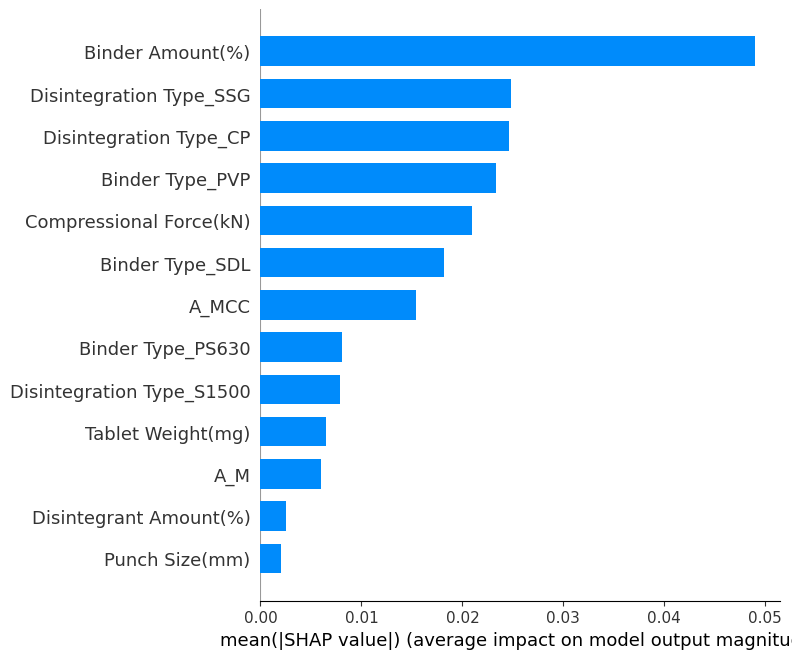

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


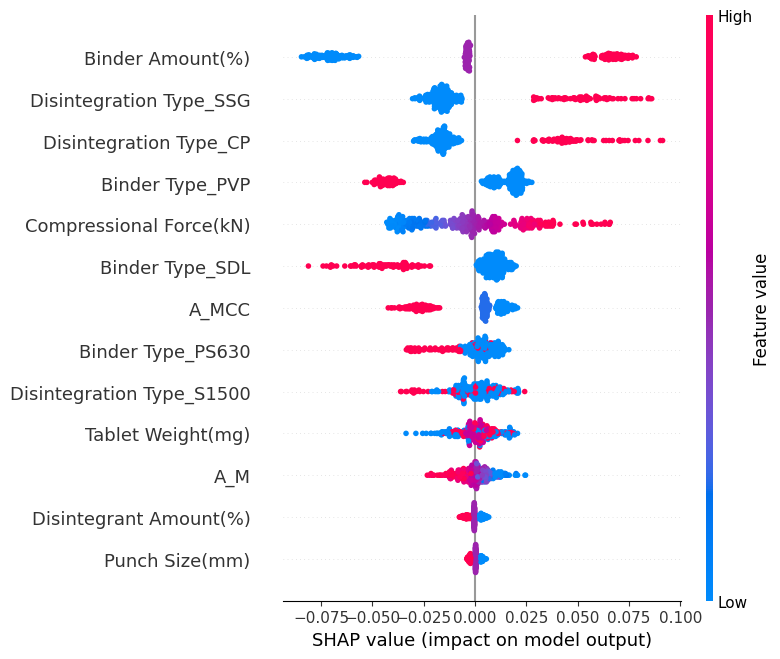

In [ ]:
import shap

# Wrap the ANN model in a function to make it callable by SHAP
def ann_predict(input_data):
    return ann_y3.predict(input_data)

# Create an explainer object for the ANN model
explainer = shap.Explainer(ann_predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot for feature importances
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_encoded.columns)

# Summary plot for individual feature impact on y3 output
shap.summary_plot(shap_values, X_test, feature_names=X_encoded.columns)
